#  <center>Burgers’ Equation (Inviscid)</center>
Nós discutimos métodos de diferenças finitas e os aplicamos em problemas simples lineares. Isso nos proporcionou um entendimento das várias técnicas e familiarizou-nos com as peculiaridades de cada abordagem. Infelizmente, o problema usual de mecânica dos fluidos é altamente não linear. As EDPs governantes formam um sistema não linear que deve ser resolvido para as pressões, densidades, temperaturas e velocidades desconhecidas. Uma única equação que poderia servir como um análogo não linear das equações de mecânica dos fluidos seria muito útil. Esta única equação deve ter termos que imitem de perto as propriedades físicas das equações de fluidos, ou seja, a equação modelo deve ter um termo convectivo, um termo difusivo ou dissipativo e um termo dependente do tempo. Burgers (1948) introduziu uma simples equação não linear que atende a esses requisitos:

\begin{equation} 
{\frac{\partial u}{\partial t}}+u{\frac{\partial u}{\partial x}}=\mu\frac{\partial^{2}u}{\partial x^{2}}
\label{eq:4.160}\tag{4.160}
\end{equation}

A equação [4.160](#mjx-eqn-eq:4.160)  é parabólica quando o termo viscoso é incluído. Se o termo viscoso for negligenciado, a equação restante é composta pelo termo instável e o termo de convecção não linear. A equação resultante que chamaremos de equação de Burgers invíscida é: 

\begin{equation} 
{\frac{\partial u}{\partial t}}+u{\frac{\partial u}{\partial x}} = 0 
\label{eq:4.161}\tag{4.161}
\end{equation}

A equação [4.161](#mjx-eqn-eq:4.161) pode ser vista como um análogo simples das equações de Euler para o fluxo de um fluido invíscido. É uma equação de convecção não linear e possui propriedades que precisam ser examinadas com mais detalhes. Nesta seção, serão apresentados métodos para resolver a equação invíscida de Burgers. São incluídos resultados típicos para diversos métodos de diferenças finitas/finitas-volumes comumente utilizados, e os efeitos dos termos não lineares são discutidos. Uma discussão sobre a equação completa de Burgers, que chamamos de equação de Burgers viscosa, segue na Seção 4.5.

A Equação equação [4.161](#mjx-eqn-eq:4.161) pode ser vista como uma equação de onda não linear, onde cada ponto na frente de onda pode se propagar com uma velocidade diferente. Em contraste, a velocidade de propagação de todos os sinais ou ondas era constante para a equação de convecção 1-D linear, Eqação 4.2. Uma consequência da variação da velocidade da onda é a coalescência de características e a formação de soluções descontínuas semelhantes a ondas de choque na mecânica dos fluidos. Isto significa que a classe de soluções que inclui descontinuidades pode ser estudada com este simples modelo de 1-D.

As equações diferenciais parciais hiperbólicas não lineares apresentam dois tipos de soluções de acordo com Lax (1954). Para simplificar, consideramos uma equação escalar simples,

\begin{equation*}
{\frac{\partial u}{\partial t}}+{\frac{\partial F}{\partial x}}=0 
\label{eq:4.162}\tag{4.162}
\end{equation*}

Para o caso geral, tanto a incógnita u quanto a variável F(u) são vetores. Podemos escrever a Equação [4.162](#mjx-eqn-eq:4.162) como

\begin{equation}
{\frac{\partial u}{\partial t}}+A{\frac{\partial u}{\partial x}} = 0
\label{eq:4.163}\tag{4.163}
\end{equation}

onde A = A(u) é a matriz Jacobiana $\frac{\partial F_i}{\partial u_j}$ para o caso geral e é $\frac{dF}{du}$ para nossa equação simples. Nossa equação ou sistema de equações é hiperbólico, o que significa que os autovalores da matriz A são todos reais. Uma solução genuína da Equação [4.163](#mjx-eqn-eq:4.163) é aquela em que u é contínua, mas podem ocorrer descontinuidades limitadas nas derivadas de u (Lipschitz contínua). Uma solução fraca da Equação [4.163](#mjx-eqn-eq:4.163) é uma solução que é genuína, exceto ao longo de uma superfície no espaço $(x, t)$, através da qual a função u pode ser descontínua. É imposto um limite ao salto em u através da descontinuidade no domínio de interesse. A ideia da forma fraca foi introduzida na Seção 3.7.3 e examinamos resultados dessa forma com mais detalhes aqui. Se $w$ é um vetor de teste que é contínuo e tem primeiras derivadas contínuas, mas desaparece fora de algum conjunto limitado, então u é chamado solução fraca da Equação [4.162](#mjx-eqn-eq:4.162) se

\begin{equation} 
\iint\limits_{D}(w_t u + w_x F)dxdt + \int w(x,0)\phi(x)~dx = 0 
\label{eq:4.164}\tag{4.164}
\end{equation}

onde $\phi(x) = u(x, 0)$. Uma solução genuína é uma solução fraca e uma solução fraca que é contínua é uma solução genuína. Uma discussão completa do conceito de solução fraca pode ser encontrada nos excelentes textos de Whitham (1974) e Jeffrey e Taniuti (1964). A teoria matemática de soluções fracas para equações hiperbólicas é um desenvolvimento relativamente recente. Claramente, a existência de ondas de choque no escoamento supersônico invíscido é um exemplo de uma solução fraca. É interessante reconhecer que as soluções de choque no escoamento supersônico invíscido eram conhecidas 50-100 anos antes que a teoria das soluções fracas para sistemas hiperbólicos fosse desenvolvida.

Vamos retomar o estudo da equação de Burgers invíscida e desenvolver os requisitos para uma solução fraca, isto é, os requisitos necessários para a existência de uma solução com uma descontinuidade como a mostrada na Figura 4.40.

Seja $w(x, t)$ uma função de teste arbitrária que é contínua e possui derivadas contínuas de primeira ordem. Suponha que $w(x, t)$ desapareça na fronteira $B$ do domínio $D$ e em todos os lugares fora de $D$ (complemento de $D$). Para simplificar, suponha que $D$ seja um domínio retangular arbitrário no plano $(x, t)$. Podemos escrever:

<figure>
    <img src="imagem440.png" 
         width="500" 
         height="250" 
         alt="Problema típico de descontinuidade no trajeto de viagem para a equação de Burgers.">
    <center><figcaption>Problema típico de descontinuidade no trajeto de viagem para a equação de Burgers.</figcaption></center>
</figure>



\begin{equation} 
\iint\limits_D \left( \frac{\partial u}{\partial t} + \frac{\partial F}{\partial x} \right) w(x,t) \mathrm{d}x \mathrm{d}t = 0
\label{eq:4.165}\tag{4.165}
\end{equation}

ou

\begin{equation} 
\iint\limits_{D} (uw_t + F w_x) \mathrm{d}x \mathrm{d}t = 0
\label{eq:4.166}\tag{4.166}
\end{equation} 

As equações [4.165](#mjx-eqn-eq:4.165) e [4.166](#mjx-eqn-eq:4.166) são equivalentes quando tanto $u$ quanto $F$ são contínuos e têm primeiras derivadas contínuas. A segunda integral da equação [4.164](#mjx-eqn-eq:4.164) não aparece, pois a função $w$ desaparece na fronteira. Funções $u(x,t)$, que satisfazem a equação [4.166](#mjx-eqn-eq:4.166) para todas as funções de teste $w$, são chamadas de soluções fracas da equação de Burgers invíscida. Não exigimos que $u$ seja diferenciável para satisfazer a equação [4.166](#mjx-eqn-eq:4.166).

Suponha que nosso domínio $D$ é agora uma região retangular no plano $(x, t)$, que é separada por uma curva $\tau(x, t) = 0$, através da qual $u$ é descontínuo. O problema é ilustrado na Figura 4.41. Assumimos que $u$ é contínuo e tem derivadas contínuas à esquerda de $\tau(D_1)$ e à direita de $\tau(D_2)$. Deixe a função de teste desaparecer na fronteira de $D$ e fora de $D$. Com essas restrições, a Equação [4.146](#mjx-eqn-eq:4.146) pode ser integrada por partes para produzir

\begin{equation} 
\int\int\limits_{D_1} \left(\frac{\partial u}{\partial t} + \frac{\partial F}{\partial x} \right) w dx dt + \int\int \limits_{D_2} \left(\frac{\partial u}{\partial t} + \frac{\partial F}{\partial x} \right) w dx dt + \int\limits_{\tau} ([u]\cos\alpha_1 + [F]\cos\alpha_2)ds = 0
\label{eq:4.167}\tag{4.167}
\end{equation} 

O último integrando é avaliado ao longo da curva $\tau(x, t) = 0$, que separa as duas regiões $D_1$ e $D_2$. Esta integral ocorre pelos limites da integração por partes na superfície de descontinuidade $\tau(x, t) = 0$. Os colchetes denotam o salto na quantidade através da descontinuidade, e $\cos \alpha_1$, $\cos \alpha_2$ são os cossenos dos ângulos entre a normal à curva $\tau(x, t) = 0$ e as direções $t$ e $x$, respectivamente.

As integrais na Equação [4.167](#mjx-eqn-eq:4.167) sobre $D_1$ e $D_2$ são zero pela Equação 4.165. Concluímos que, uma vez que a última integral se anula para todas as funções de teste $w$ com as propriedades necessárias, devemos ter

\begin{equation}
[u] \cos \alpha_1 + [F] \cos \alpha_2 = 0
\label{eq:4.168}\tag{4.168}
\end{equation}


<figure>
    <img src="imagem441.png" 
         width="500" 
         height="250" 
         alt="Representação esquemática de um domínio arbitrário com uma descontinuidade.">
    <center><figcaption>Representação esquemática de um domínio arbitrário com uma descontinuidade.</figcaption></center>
</figure>

Esta é a condição para que $u$ seja uma solução fraca para a equação de Burgers. Nenhuma perda de generalidade foi incorrida pela divisão do domínio em duas partes separadas pela descontinuidade. Se a descontinuidade não se moveu para a fronteira externa, o problema é mais simples, uma vez que o domínio é composto por apenas um elemento. O caminho de integração segue em torno das fronteiras do domínio e sobe um lado da descontinuidade e desce pelo outro. A condição necessária que deve ser satisfeita através da descontinuidade é a mesma dada na Equação [4.168](#mjx-eqn-eq:4.168). Esta condição é agora aplicada à descontinuidade em movimento e fornece resultados importantes sobre seu movimento. Vamos aplicar essa condição a uma descontinuidade em movimento. Suponha que dados iniciais sejam prescritos para $u(x, 0)$, conforme mostrado na Figura 4.40, onde $u_1$ e $u_2$ denotam os valores à esquerda e à direita da descontinuidade. Em uma dimensão, podemos escrever a equação da superfície $\tau(x, t) = 0$ como $t - t_1 (x) = 0$. Os cossenos diretores necessários na Equação 4.148 se tornam

\begin{eqnarray}
\cos \alpha_1 = \frac{1}{\left [ 1 + t_1'^2 \right ]^{1/2}} \qquad \cos \alpha_2 = \frac{t_1'}{\left [ 1 + t_1'^2 \right ]^{1/2}} \\
\end{eqnarray}

onde o primo denota diferenciação em relação a $x$. Assim,

\begin{equation}
\frac{\left [ u \right ]}{\left [ 1+t'^2 \right ] ^{\frac{1}{2}}} - \frac{ \left [ F \right ] t'}{\left [ 1+t'^2 \right ]^{\frac{1}{2}}}  = 0
\end{equation}

ou

\begin{equation} 
u_2 - u_1 =  \frac{u_2^2 - u_1^2}{2} \frac{dt}{dx} 
\end{equation}

portanto,

\begin{equation} 
\frac{dx}{dt} = \frac{u_1+u_2}{2} 
\label{eq:4.169}\tag{4.169}
\end{equation}

Isso mostra que a descontinuidade viaja com o valor médio da função $u$ através da frente de onda. Agora que vemos que uma descontinuidade em $u$ simplesmente se propaga com velocidade constante $\left ( u_1+u_2 \right ) / 2$, com estados uniformes em cada lado, uma solução numérica de problema semelhante para uma descontinuidade pode ser comparada com a solução exata. Essas comparações são apresentadas para vários métodos de diferenças finitas/volumes finitos nesta seção.

rarefação são tão prevalentes em fluxos de alta velocidade quanto ondas de choque, e a solução exata da equação de Burgers para uma raridade é conhecida. Considere os dados iniciais $u(x, 0)$ como mostrado na Figura 4.42. A característica da equação de Burgers é dada por:

\begin{equation}
\frac{dt}{dx} = \frac{1}{u}
\label{eq:4.170}\tag{4.170}
\end{equation}

A Figura 4.43 mostra o diagrama característico plotado no plano $(x, t)$. Na metade esquerda do plano, as características são simplesmente linhas verticais, enquanto que à direita da característica que delimita a raridade, elas são linhas com um ângulo de $\pi/4$ radianos. Este problema em particular é semelhante a uma onda de expansão central em fluxo compressível. Aqui, a expansão é delimitada pelo eixo $x=0$ e a característica originada na origem, denotada pela linha tracejada. A solução para esse problema pode ser escrita como:

<figure>
    <img src="imagem442.png" 
         width="500" 
         height="250" 
         alt="Dados iniciais para a onda de rarefação.">
    <center><figcaption>Dados iniciais para a onda de rarefação.</figcaption></center>
</figure>

<figure>
    <img src="imagem443.png" 
         width="500" 
         height="250" 
         alt="Características para expansão centrada.">
    <center><figcaption>Características para expansão centrada.</figcaption></center>
</figure>


\begin{eqnarray}
u &=& 0           \qquad &x& \leq 0 \\
u &=& \frac{x}{t} \qquad &0& < x < t \\
u &=& 0           \qquad &x& \geq 0 
\end{eqnarray}

A distribuição inicial de $u$ forma uma expansão centrada, onde a largura da expansão cresce linearmente com o tempo. 

Examina-se dois problemas, choques e rarefações, que são frequentemente encontrados em fluxos de alta velocidade usando o simples analogia fornecido pela equação de Burgers. Claramente, esses tipos de soluções podem ocorrer em sistemas de equações não lineares do tipo hiperbólico. Munidos de soluções analíticas simples para esses dois casos importantes, vamos examinar a aplicação de alguns algoritmos numéricos à equação de Burgers não viscosa e não linear.

# <center> Método de Lax  </center> 

Métodos de primeira ordem para resolver equações hiperbólicas são raramente usados. O método de Lax (1954) é apresentado como um típico método de primeira ordem para demonstrar a aplicação a uma equação não linear e o caráter dissipativo do resultado. A forma de conservação da equação diferencial parcial básica...

\begin{eqnarray}
\frac{\partial u}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{eqnarray}

É usado para todos os exemplos que seguem. Para o método de Lax, expandimos em uma série de Taylor em torno do ponto $(x, t)$, mantendo apenas os dois primeiros termos.

\begin{equation} 
u(x, t + \Delta t) = u(x, t) + \Delta t \left ( \frac{\partial u}{\partial t} \right )_{x,t} + \cdots
\end{equation}

E substituir a derivada em relação ao tempo

\begin{equation} 
u(x, t + \Delta t) = u(x, t) - \Delta t \left ( \frac{\partial F}{\partial t} \right )_{x,t} + \cdots
\end{equation}

Usando diferenças centradas e a média da primeira parcela, obtemos o método de Lax (ver seção 4.1.3):

\begin{equation} 
u_{j}^{n+1} = \frac{u_{j+1}^{n}  + u_{j-1}^{n} }{2} - \frac{\Delta t}{\Delta x} \frac{F_{j+1}^{n} - F_{j-1}^{n}}{2}
\end{equation}

Na equação de Burgers, $F = \frac{u^2}{2}$, Então $F_{j+1}^n = \frac{(u_{j+1}^{n})^2}{2}$. Daí

\begin{equation} 
u_{j}^{n+1} = \frac{u_{j+1}^{n}  + u_{j-1}^{n} }{2} - \frac{\Delta t}{\Delta x} \frac{\frac{(u_{j+1}^{n})^2}{2} - \frac{(u_{j-1}^{n})^2}{2}}{2}
\end{equation}

O fator de amplificação neste caso é

\begin{equation*} G = \cos \beta - i\frac{\Delta t}{\Delta x}A \sin \beta, \end{equation*}

onde $A$ é o Jacobiano $\frac{dF}{du}$, que é apenas o único elemento $u$ para a equação de Burgers.

O requisito de estabilidade para este método é

\begin{equation}
\left | \frac{\Delta t}{\Delta x}u_{\text{max}} \right | \leq 1 
\end{equation}

pois $u_{\text{max}}$ é o autovalor máximo da matriz $A$ com o único elemento $u$.

O método de Lax aplicado a uma descontinuidade de movimento direito de um para zero produz as soluções mostradas na Figura 4.44. A locação da descontinuidade móvel é corretamente prevista, mas a natureza dissipativa do método é evidente na difusão da descontinuidade por vários intervalos de malha. Como observado anteriormente, essa difusão piora à medida que o número de Courant diminui. É interessante notar que a aplicação do método de Lax à equação de Burgers com uma descontinuidade produz soluções de duplo ponto, como mostrado. Um comentário adicional sobre esses resultados é necessário. Observe que as soluções computadas são

<figure>
    <img src="imagem444.png" 
         width="500" 
         height="250" 
         alt="Solução numérica da equação de Burgers utilizando o método de Lax.">
    <center><figcaption>Solução numérica da equação de Burgers utilizando o método de Lax.</figcaption></center>
</figure>

A solução numérica da equação de Burgers utilizando o método de Lax é monotônica, isto é, a solução não oscila. Godunov (1959) mostrou que o comportamento monotônico de uma solução não pode ser garantido para métodos de diferenças finitas com precisão superior à primeira ordem. Essa propriedade monotônica é muito desejável quando descontinuidades fazem parte da solução. Infelizmente, a desejabilidade do comportamento monotônico deve ser conciliada com o caráter altamente dissipativo dos resultados. A importância relativa dessas propriedades deve ser cuidadosamente avaliada para cada caso.

O equivalente de volumes finitos do método de Lax pode ser desenvolvido facilmente ao notar que a integração de primeira ordem (no tempo) sobre um volume de controle (veja a Figura 4.45) fornece a expressão 

\begin{equation} 
u_{j}^{n+1} = u_{n,j} - \frac{\Delta t}{\Delta x} \left [ f_{j+1/2}^n- f_{j-1/2}^n \right ] 
\tag{4.174}
\end{equation} 

Nesta expressão, o volume de controle pode ser considerado centrado no ponto $(j, n+\frac{1}{2})$. Os termos de fluxo, $f_{j\pm\frac{1}{2}}$, são chamados de fluxos numéricos, uma vez que representam o fluxo na superfície do volume de controle na formulação de volumes finitos. Funcionalmente, o fluxo numérico é escrito como 

$$f_{j+\frac{1}{2}} = f(u_j, u_{j+1})$$

O fluxo numérico deve ser consistente com o fluxo analítico F para que 

\begin{equation} 
f(u_j,u_{j+1})=f(u_j)
\tag{4.175}
\end{equation} 

quando 

$$u_j=u_{j+1}=u$$

O problema de encontrar a função de fluxo é muito importante porque ela representa o fluxo de fronteira do volume de controle. Isso é necessário na construção de métodos para resolver as equações da dinâmica dos fluidos na forma conservativa.

<figure>
    <img src="imagem445.png" 
         width="400" 
         height="200" 
         alt="Volume de controle para o método de Lax.">
    <center><figcaption>Volume de controle para o método de Lax.</figcaption></center>
</figure>

Peço desculpas pela inconveniência. Aqui está o código LaTeX das equações fornecidas:

Para o método de Lax, o fluxo numérico se torna:
\begin{equation}
f_{j+\frac{1}{2}} = \frac{1}{2}\left[F_j + F_{j+1} - \frac{\Delta x}{\Delta t}(u_{j+1} - u_j)\right] \tag{4.176}
\end{equation}

O último termo nessa expressão pode ser visto como um termo de dissipação. A ordem do esquema numérico pode ser alterada usando uma forma diferente para esse termo. Será valioso comparar a Equação 4.176 com os termos de fluxo numérico de outros métodos neste capítulo.

Outra observação pode ser feita em relação ao método de Lax. Observe que as soluções computacionais na Figura 4.44 são monótonas, ou seja, a solução não oscila. Godunov (1959) estudou métodos numéricos aplicados à simples equação de onda unidimensional (Equação 4.2), que tem a forma linear:

\begin{equation}
u_{j}^{n+1} = \sum a_k u_{j+k}^n
\tag{4.177}
\end{equation}

Se o lado direito for expandido em uma série de Taylor, a precisão de segunda ordem para tal método é estabelecida se:

\begin{equation}
\sum_k a_k = 1 
\tag{4.178}
\end{equation}

\begin{equation}
\sum_k ka_k = -\nu 
\tag{4.179}
\end{equation}

\begin{equation}
\sum_k k^2a_k = \nu^2 
\tag{4.180}
\end{equation}

Isso pode ser verificado examinando os esquemas de segunda ordem considerados anteriormente na seção 4.1.

Se as soluções produzidas pela Equação 4.177 não oscilarem, quais são as condições que garantem um comportamento monótono? Uma condição necessária e suficiente é que todos os coeficientes $a_k$ sejam positivos. Considere a mudança na solução entre os pontos $j$ e $j + 1$:

\begin{equation}
u_{j+1}^{n+1} - u_{j}^{n+1} = \sum_k a_k \left(u_{j+k+1}^n - u_{j+k}^n \right) 
\tag{4.181}
\end{equation}

Se a solução no nível $n$ for monótona, então todas as diferenças no lado direito são do mesmo sinal. Assim, se todos os $a_k$ forem positivos, as diferenças nos lados direito e esquerdo terão o mesmo sinal. Isso também é uma condição necessária, pois, para pelo menos um valor de $a_k$ de sinal oposto, podem ser construídos dados iniciais monótonos que produzem uma oscilação no próximo nível.

O teorema de Godunov (1959) afirma que esquemas de segunda ordem não são monótonos. Isso pode ser provado deixando $a_k = (e_k)^2$ e substituindo nas Equações 4.178 a 4.180 para obter:

\begin{equation}
\sum_k (e_k)^2 \left(\sum k e_k^2\right)^2 = \sum_k k^2 e_k^2
\end{equation}

Essa equação viola a desigualdade de Cauchy e mostra que não existem esquemas de segunda ordem monótonos. Esse resultado apresentou uma grande dificuldade que precisava ser superada no desenvolvimento de métodos para resolver equações diferenciais parciais hiperbólicas. Em regiões onde ocorrem descontinuidades, medidas devem ser tomadas para evitar oscilações.

# <center> Método de Lax–Wendroff</center> 

O método de Lax-Wendroff (Lax e Wendroff, 1960) foi um dos primeiros métodos de diferenças finitas de segunda ordem para equações diferenciais parciais hiperbólicas. O desenvolvimento do esquema de Lax-Wendroff para equações não lineares segue novamente a partir de uma série de Taylor:

\begin{equation}
u(x, t + \Delta t) = u(x, t) + \Delta t \left(\frac{\partial u}{\partial t}\right)_{x,t} + \frac{(\Delta t)^2}{2} \left(\frac{\partial^2 u}{\partial t^2}\right)_x + \ldots
\end{equation}

A primeira derivada temporal pode ser diretamente substituída usando a equação diferencial, mas precisamos examinar o termo da segunda derivada com mais detalhes. Consideramos a equação original na forma:

\begin{equation}
\frac{\partial u}{\partial t} = -\frac{\partial F}{\partial x}
\end{equation}

Ao diferenciar essa expressão em relação ao tempo, obtemos:

\begin{equation}
\frac{\partial^2 u}{\partial t^2} = -\frac{\partial^2 F}{\partial x \partial t} = -\frac{\partial}{\partial t}\left(\frac{\partial F}{\partial x}\right)
\end{equation}

onde a ordem de diferenciação em $F$ foi trocada. Agora, $F = F(u)$, o que nos permite escrever:

\begin{equation}
\frac{\partial u}{\partial t} = -\frac{\partial F}{\partial x} = -\frac{\partial F}{\partial u} \frac{\partial u}{\partial x} = -A\frac{\partial u}{\partial x}
\end{equation}

e

\begin{equation}
\frac{\partial F}{\partial t} = \frac{\partial F}{\partial u} \frac{\partial u}{\partial t} = A \frac{\partial u}{\partial t}
\end{equation}

Portanto, podemos substituir $\frac{\partial u}{\partial t}$ por $-\frac{\partial F}{\partial x}$ e $\frac{\partial F}{\partial t}$ por $A\frac{\partial u}{\partial t}$, resultando em:

\begin{equation}
\frac{\partial F}{\partial t} = -\frac{\partial F}{\partial x}
\end{equation}

Portanto,

\begin{equation}
\frac{\partial^2 u}{\partial t^2} = \frac{\partial}{\partial x} \left( A\frac{\partial F}{\partial x} \right)
\end{equation}

O Jacobiano $A$ contém um único elemento para a equação de Burgers. Fica claro que $A$ é uma matriz quando $u$ e $F$ são vetores ao tratar um sistema de equações. Fazendo a substituição apropriada na expansão da série de Taylor para $u$, obtemos:

\begin{equation}
u(x, t + \Delta t) = u(x, t) - \Delta t \frac{\partial F}{\partial x} + \frac{(\Delta t)^2}{2}  \frac{\partial}{\partial x} \left(A\frac{\partial F}{\partial x}\right) + \cdots
\end{equation}

Depois de usar diferenças centrais, o método Lax-Wendroff é obtido da seguinte forma:

\begin{equation}
u_{j}^{n+1} = u_{n,j} - \frac{\Delta t}{\Delta x} \frac{F_{j+1}^n - F_{j-1}^n}{2}  + \frac{1}{2} \left( \frac{\Delta t}{\Delta x} \right)^2 \left[ A_{j+\frac{1}{2}}^n \left( F_{j+1}^n - F_j^n \right) - A_{j-\frac{1}{2}}^n \left( F_{j,n} - F_{j-1}^n \right) \right]
\end{equation}

A matriz jacobiana é avaliada no ponto médio do intervalo, ou seja,

\begin{equation}
A_{j+\frac{1}{2}} = A\frac{u_j - u_{j+1}}{2}
\end{equation}

Na equação de Burgers, temos que: $F = u^2/2$ e $A = u$. Nesse caso, temos que: $A_{j+1/2} = (u_{j+1} + u_j)/2$ e $A_{j-1/2} = (u_j + u_{j-1})/2$. O fator de amplificação para esse método é dado por:

\begin{equation}
G = 1 - 2 \left( \frac{\Delta t}{\Delta x} A \right)^2 \left(1 - \cos \beta \right) - 2i \frac{\Delta t}{\Delta x} A \sin \beta
\end{equation}

E o requisito de estabilidade é dado por: $\left| \left( \Delta t /\Delta x \right) \right|u_{max} \leq 1$.

Os resultados obtidos quando o método Lax-Wendroff é aplicado ao nosso problema de exemplo são mostrados na Figura 4.46. A descontinuidade que se move para a direita está corretamente posicionada e bem definida. A natureza dispersiva desse método é evidenciada pela presença de oscilações próximas à descontinuidade. Mesmo que o método utilize diferenças centrais, ocorrerá alguma assimetria, uma vez que a onda está se movendo. A solução apresenta mais oscilações quando um número de Courant de 0,6 é usado em comparação com um número de Courant de 1,0. Em geral, à medida que o número de Courant é reduzido, a qualidade da solução será degradada (consulte a Seção 4.1.6).

O fluxo numérico para o esquema Lax-Wendroff consistente com a Equação 4.176 pode ser escrito como:

\begin{equation}
f_{j+\frac{1}{2}} = \frac{1}{2} \left( F_j + F_{j+1} \right) - \frac{1}{2}\frac{\Delta t}{\Delta x} \left( \lambda_{j+\frac{1}{2}} \right)^2 \left( u_{j+1} - u_j \right)
\end{equation}

Onde $\lambda_{j+1/2}$ é definido como o autovalor do Jacobiano $A_{j+1/2}$, que é simplesmente $u_{j+1/2}$ para a equação de Burgers.

<figure>
    <img src="imagem446.png" 
         width="400" 
         height="200" 
         alt="Aplicação do método Lax-Wendroff à equação de Burgers invíscida.">
    <center><figcaption>Aplicação do método Lax-Wendroff à equação de Burgers invíscida.</figcaption></center>
</figure>


Uma comparação entre a Equação 4.184 e a Equação 4.176 pode fornecer informações valiosas sobre a ordem e o comportamento dos métodos numéricos. Conforme observado na seção anterior, o esquema de Lax é monótono, enquanto a Figura 4.46 mostra que o esquema de Lax-Wendroff de segunda ordem não é. Se compararmos os termos do fluxo numérico, veremos que a diferença entre esses termos é:

\begin{equation}
\Delta x \left(\frac{u_{j+1} - u_j}{\Delta x}\right)\left(1 - \frac{\lambda_{j+1/2} \Delta t}{\Delta x}\right) \quad (4.185)
\end{equation}

Essa diferença é uma correção que pode ser adicionada ao método de Lax para fornecer precisão de segunda ordem e, de fato, modificar a solução para a forma do esquema de Lax-Wendroff. No entanto, se ocorrerem oscilações em descontinuidades, como visto na Figura 4.46, o termo de correção deve ser suprimido na região onde as descontinuidades aparecem. Isso terá o efeito de reduzir a ordem do método e ter o potencial de fornecer perfis monotônicos ou quase-monotônicos por meio das descontinuidades. O controle do termo de correção é geralmente realizado pelo uso de limitadores. Com essa ideia em mente, o fluxo pode ser escrito como:

\begin{equation}
f_{j+1/2} = \frac{1}{2} \left( F_{j} + F_{j+1} - \frac{\Delta x}{\Delta t}(u_{j+1} - u_j) \right) + \phi \frac{\Delta x \Delta t}{2}\left(u_{j+1}^2 - u_j^2\right)\left(1 - \frac{\lambda_{j+1/2} \Delta t}{\Delta x}\right) \quad (4.186)
\end{equation}

onde $\phi$ é uma função que pode ser ajustada para limitar a adição dos termos de segunda ordem. O método híbrido apresentado por Harten e Zwas (1972) utilizou essa ideia. O conceito de utilizar limitadores para melhorar a eficácia das técnicas de solução é discutido em detalhes na Seção 4.4.12.


# <center> MacCormack (Inviscido)  </center> 

O método de MacCormack (1969) é uma versão de predição-correção do esquema de Lax-Wendroff, conforme discutido na seção 4.1.8. Esse método é muito mais fácil de aplicar do que o esquema de Lax-Wendroff, porque o Jacobiano não aparece. Quando aplicado à equação de Burgers invíscida, o método de MacCormack se torna

Predictor: 

\begin{eqnarray}
u_j^{\overline{n+1}} &=& u_j^n - \frac{\Delta t}{\Delta x} \left ( F_{j+1}^n - F_{j}^n) \right ) \\
\label{eq:4.187}\tag{4.187} \\
u_j^{n+1} &=& \frac{1}{2} \left [ u_j^n +u_j^{\overline{n+1}} - \frac{\Delta t}{\Delta x}\left ( F_j^{\overline{n+1}} - F_{j-1}^{\overline{n+1}} \right ) \right ]
\end{eqnarray}

O fator de amplificação e o requisito de estabilidade são os mesmos apresentados para o método de Lax-Wendroff. Os resultados da aplicação deste método são mostrados na Figura 4.47. Novamente, a onda que se move para a direita é bem definida. Observamos que as soluções obtidas para o mesmo problema no mesmo número de Courant são diferentes daquelas obtidas usando o esquema de Lax-Wendroff. Isso se deve tanto à diferenciação trocada no preditor e no corretor quanto à natureza não linear da equação governante PDE. Deve-se esperar resultados que mostrem algumas diferenças, mesmo que ambos os métodos sejam equivalentes para problemas lineares.

<figure>
    <img src="imagem447.png" 
         width="500" 
         height="250" 
         alt="Solução da equação de Burgers usando o método de MacCormack.">
    <center><figcaption>Solução da equação de Burgers usando o método de MacCormack.</figcaption></center>
</figure>

A diferença no preditor está na direção de propagação da descontinuidade. Isso será evidente quando os exercícios propostos dados no final do capítulo forem concluídos.

\begin{equation} 
u_{j}^{n+1} = \frac{u_{j+1}^{n}  + u_{j-1}^{n} }{2} - \frac{\Delta t}{\Delta x} \frac{F_{j+1}^{n} - F_{j-1}^{n}}{2}
\end{equation}

Na equação de Burgers, $F = \frac{u^2}{2}$, Então $F_{j+1}^n = \frac{(u_{j+1}^{n})^2}{2}$. Daí

\begin{equation} 
u_{j}^{n+1} = \frac{u_{j+1}^{n}  + u_{j-1}^{n} }{2} - \frac{\Delta t}{\Delta x} \frac{\frac{(u_{j+1}^{n})^2}{2} - \frac{(u_{j-1}^{n})^2}{2}}{2}
\end{equation}

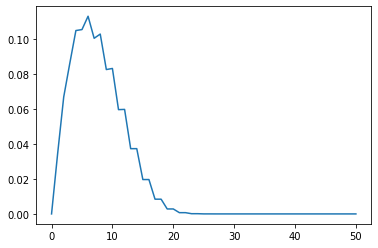

In [102]:
# Método de lax
'''
Utilize o método de Lax para resolver a equação de 
Burgers invíscida usando uma malha com 51 pontos na
direção x. Resolva esta equação para uma descontinuidade
propagante para a direita, com dados iniciais u = 1 nos 
primeiros 11 pontos da malha e u = 0 em todos os outros 
pontos. Repita seus cálculos para números de Courant 
de 1.0, 0.6 e 0.3, e compare suas soluções numéricas com 
a solução analítica no mesmo instante.
'''
import numpy as np
import matplotlib.pyplot as plt

quantidade_iteracao = 21
l=1
delta_x = 1
v=0.3
t=5
n=3
c=1
q_pontos = 51
delta_t = t/quantidade_iteracao
NI = 0.5


u_old = np.zeros(q_pontos)
u_new = np.zeros(q_pontos)

U_NUM = np.zeros((quantidade_iteracao,q_pontos))


# Condições Iniciais.
x = np.linspace(0,l,q_pontos)
U_NUM[0,0:10]  = 1
U_NUM[0,11:]   = 0

'''
# Solução
for i in range(quantidade_iteracao-1):
    U_NUM[i+1,0:] = (1-NI)*U_NUM[i,0:]+NI*U_NUM[i,0:U_NUM.shape[1]]
    
# Solução
for i in range(quantidade_iteracao-1):
    U_NUM[i+1,1:] = (1-NI)*U_NUM[i,1:]+NI*U_NUM[i,0:U_NUM.shape[1]-1]
    
'''

for n in range (0, quantidade_iteracao-1):
    for j in range(1,q_pontos-1):
        U_NUM[n+1,j]  = (U_NUM[n,j+1] + U_NUM[n,j-1]) / 2 - (delta_t/(2*delta_x)) * ((U_NUM[n,j+1]**2)/4)-((U_NUM[n,j-1]**2)/4)
for n in range (0, quantidade_iteracao-1):
    for j in range(1,q_pontos-1):
        U_NUM[n+1,j]  = (U_NUM[n,j+1] + U_NUM[n,j-1]) / 2 - (delta_t/(2*delta_x)) * ((U_NUM[n,j+1]**2)/4)-((U_NUM[n,j-1]**2)/4)

        
plt.plot(U_NUM[19,])
plt.show()
    
    #u_old[0]  = 1
    #u_old[-1] = 0

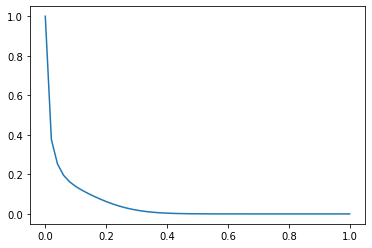

In [65]:
plt.plot(x,u_old)


In [62]:
(delta_t/(2*delta_x))

0.25

In [41]:
delta_t

0.5

In [42]:
delta_x

1